In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = "gray"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, Callback

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print()
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)

(10000, 28, 28)
(10000,)


In [4]:
class_names = ["Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankleboot"]

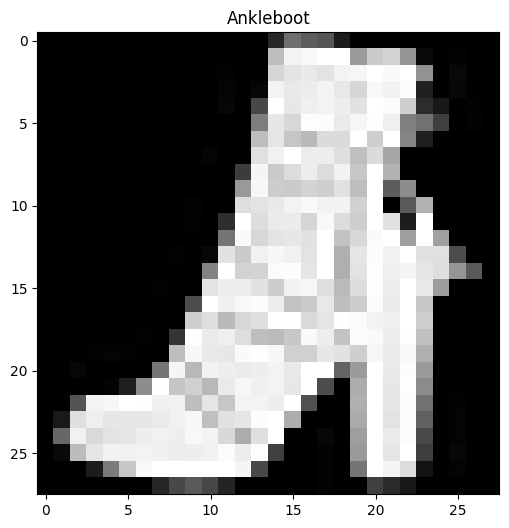

In [5]:
plt.figure(figsize=(8, 6))
plt.imshow(train_images[11])
plt.title(class_names[train_labels[11]]);

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Building the Model

In [7]:
# EarlyStopping
callbacks = EarlyStopping(monitor="val_loss", patience=5, verbose=1, restore_best_weights=True)

In [8]:
# Build, compile and fit
model = Sequential(
    [
        Flatten(input_shape=(28, 28)),
        Dense(100, activation="relu"),
        Dense(10, activation="softmax")
    ]
)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

histoy = model.fit(
    train_images,
    train_labels,
    epochs=100,
    callbacks=[callbacks],
    validation_split=0.2
)

c:\Users\Usuario iTC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7712 - loss: 0.6686 - val_accuracy: 0.8534 - val_loss: 0.4199
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8590 - loss: 0.3927 - val_accuracy: 0.8627 - val_loss: 0.3892
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8706 - loss: 0.3562 - val_accuracy: 0.8698 - val_loss: 0.3626
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8814 - loss: 0.3238 - val_accuracy: 0.8697 - val_loss: 0.3641
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8877 - loss: 0.3065 - val_accuracy: 0.8640 - val_loss: 0.3726
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8907 - loss: 0.2925 - val_accuracy: 0.8787 - val_loss: 0.3366
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8997 - loss: 0.2739 - val_accuracy: 0.8786 - val_loss: 0.3518
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8985 - loss: 0

In [9]:
# Let's see what our test accuracy looks like
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8857 - loss: 0.3337
Test Accuracy: 0.885699987411499


Text(0, 0.5, 'Epoch')

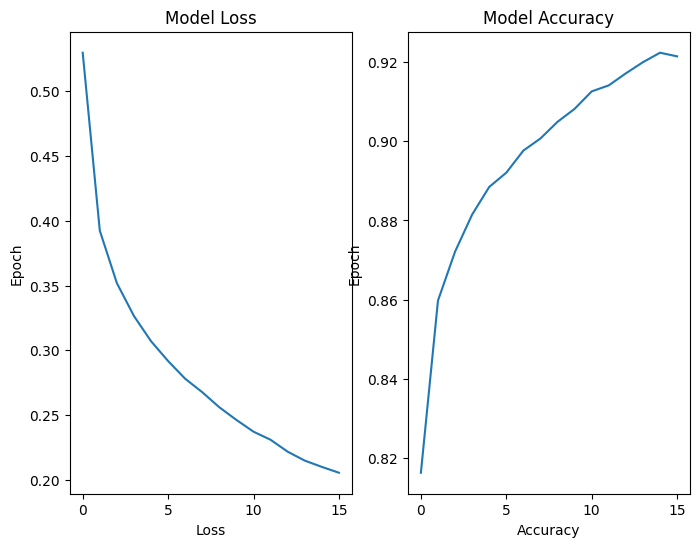

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].plot(histoy.history["loss"])
ax[0].set_title("Model Loss")
ax[0].set_xlabel("Loss")
ax[0].set_ylabel("Epoch")

ax[1].plot(histoy.history["accuracy"])
ax[1].set_title("Model Accuracy")
ax[1].set_xlabel("Accuracy")
ax[1].set_ylabel("Epoch")

### Early Stopping with custom callbacks

We can extend the capabilities of callbacks by writing our own custom callbacks for early stopping.

This adds flexibility to callbacks so we can implement some desired logic during training. The TensorFlow documentation provides several ways to do this. Let's implement a simple callback to track our validation accuracy:

In [11]:
class EarlyStop(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get("val_accuracy") > 0.85):
            print("Validation Accuracy has been reached.")
            self.model.stop_training = True
callback = EarlyStop()

### Adding neurons in the Hidden Layer

In [12]:
def train_model(
    hidden_neurons,
    train_images,
    train_labels,
    callbacks=None,
    validation_split=0.2,
    epochs=100
):
    model = Sequential(
        [
            Flatten(input_shape=(28, 28)),
            Dense(hidden_neurons, activation="relu"),
            Dense(10, activation="softmax")
        ]
    )
    
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(
        train_images,
        train_labels,
        epochs=epochs,
        callbacks=[callbacks] if callbacks else None,
        validation_split=validation_split
    )
    return model, history

In [13]:
neuron_values = [1, 500]

for neuron in neuron_values:
    model, history = train_model(neuron, train_images, train_labels, callbacks=callbacks)
    print(f"Trained model with {neuron} neurons in the hidden layer")

c:\Users\Usuario iTC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2046 - loss: 2.0326 - val_accuracy: 0.2692 - val_loss: 1.7556
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2734 - loss: 1.7199 - val_accuracy: 0.2902 - val_loss: 1.6310
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3136 - loss: 1.6194 - val_accuracy: 0.3416 - val_loss: 1.5728
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3539 - loss: 1.5632 - val_accuracy: 0.3857 - val_loss: 1.5419
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3830 - loss: 1.5169 - val_accuracy: 0.3869 - val_loss: 1.5078
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
Trained model with 1 neurons in the hidden layer
Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7834 - loss: 0.6184 - val_accuracy: 0.8464 - val_loss: 0.4190
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8626 - loss